# Exploratory data analysis

In [135]:
import os
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
path = './dataset/'

## Visualization

It'a a great idea to visualize the data you are working with  
Visualizing bounding boxed on images is easy enough, especially if points are in YOLOv4 format

In [22]:
# Saving just 'names' since in YOLOv4 format each image has 2 files - .txt with BB and .jpg
files = os.listdir(path)
files = np.array([x[:-4] for x in files if x.endswith('.txt')])

In [161]:
def plot_image(idx):
    f = open(path + files[idx] + '.txt')
    lms = f.read()
    f.close()
    lms = lms.split('\n')
    landmarks = []
    # split by value
    for row in lms:
        row = row.split()
        landmarks.append(row)
    landmarks = landmarks[:-1]

    image = cv2.imread(path + files[idx] + '.jpg')
    shape = image.shape

    for lm in landmarks:
        lm = [float(x) for x in lm]
        cls = int(lm[0])

        # create top left and bottom right points
        point1 = (
            int((lm[1] + lm[3] * 0.5) * shape[1]),
            int((lm[2] + lm[4] * 0.5) * shape[0])
        )
        point2 = (
            int((lm[1] - lm[3] * 0.5) * shape[1]),
            int((lm[2] - lm[4] * 0.5) * shape[0])
        )
        # decide color of BB by class
        image = cv2.rectangle(
            image, point1, point2, (255 * int(cls == 0), 255 * int(cls == 1), 255 * int(cls == 2)), 2)

    return image, landmarks

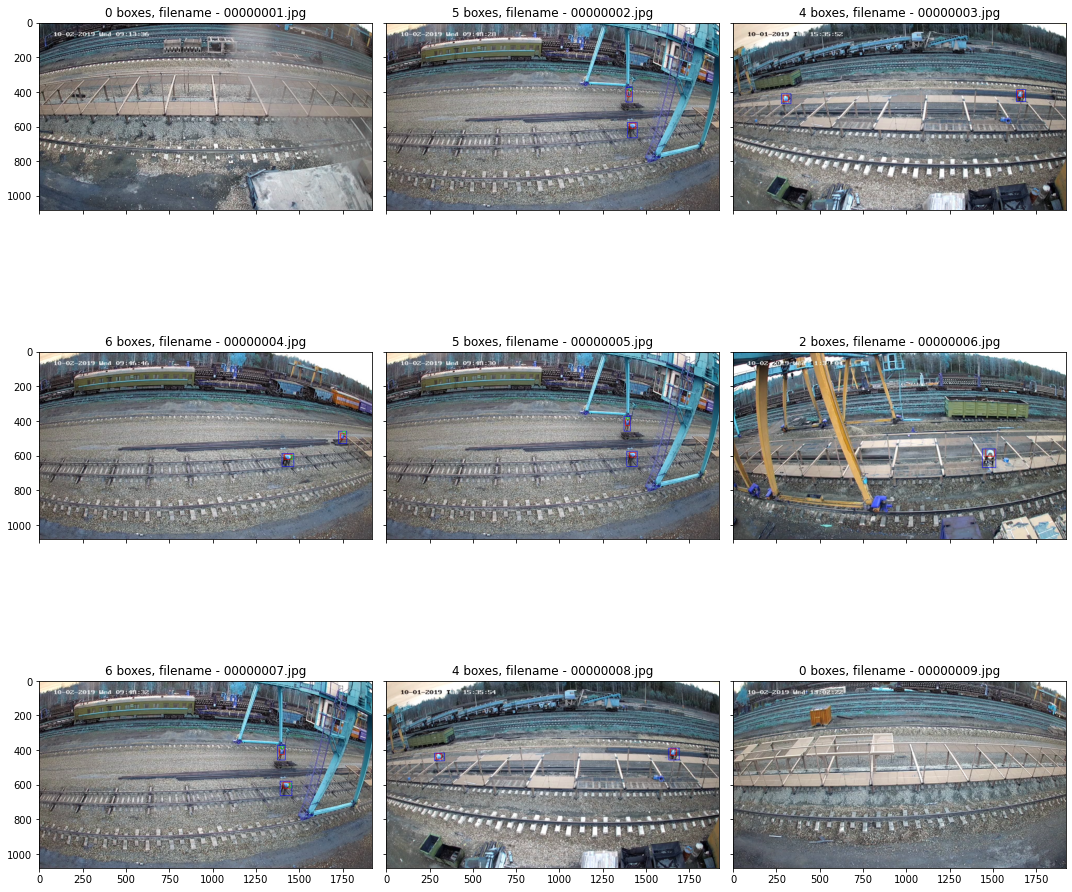

In [183]:
# 3x3 matrix of images should be enough
fig, axs = plt.subplots(3, 3, figsize = (15,15))
axs = axs.flatten()

for idx in range(9):
    image, landmarks = plot_image(idx)
        
    axs[idx].imshow(image)
    axs[idx].set_title(f'{len(landmarks)} boxes, filename - {files[idx]}.jpg')

for ax in fig.get_axes():
    ax.label_outer()

plt.tight_layout()
plt.show()

## Numeric statistics

Don't really know how this might help - but it might 

In [125]:
box_counts = 0
running_width = 0
running_height = 0
box_widths = []
box_heights = []
box_x = []
box_y = []
classes = []


for fname in files:
    f = open(path + fname + '.txt')
    lms = f.read()
    f.close()
    lms = lms.split('\n')
    landmarks = []

    for row in lms[:-1]:
        row = row.split()
        # landmarks.append(row)
        classes.append(int(row[0]))
        box_x.append(float(row[1]))
        box_y.append(float(row[2]))
        box_widths.append(float(row[3]))
        box_heights.append(float(row[4]))

    image = cv2.imread(path + files[idx] + '.jpg') 
    shape = image.shape

    running_width += shape[0]
    running_height += shape[1]
    box_counts += len(lms) - 1

In [128]:
print(f'Average width and height of images - ({running_width / len(files)}, {running_height / len(files)})')


Average width and height of images - (1080.0, 1920.0)


So basically all images are 1920x1080

Great for stats below!

In [138]:
print('All numbers below are in Pixels\n\n')

print(f'Total images - {len(files)}\n')

print(f'Mean of center of objects - ({np.mean(box_x) * 1920}, {np.mean(box_y) * 1080})')
print(f'Std of center of objects - ({np.std(box_x) * 1920}, {np.std(box_y) * 1080})')
print(f'Var of center of objects - ({np.var(box_x) * 1920}, {np.var(box_y) * 1080})')

print()

print(f'Mean width and height of objects - ({np.mean(box_widths) * 1920}, {np.mean(box_heights) * 1080})')
print(f'Std width and height of objects - ({np.std(box_widths) * 1920}, {np.std(box_heights) * 1080})')
print(f'Var width and height of objects - ({np.var(box_widths) * 1920}, {np.var(box_heights) * 1080})')

print()

u, c = np.unique(classes, return_counts=True)
print(f'Class counts - \n{np.asarray((u, c)).T}')


All numbers below are in Pixels


Total images - 3222

Mean of center of objects - (914.1193066595146, 561.317068338474)
Std of center of objects - (551.4582029101883, 179.96513929232506)
Var of center of objects - (158.38861956090335, 29.988380889357376)

Mean width and height of objects - (47.67054616065442, 67.08241573823254)
Std width and height of objects - (24.97615477541865, 41.619621847775434)
Var width and height of objects - (0.3249001600862853, 1.6038823358813208)

Class counts - 
[[   0 7883]
 [   1 6515]
 [   2 7973]]


## Closer inspection of a few images

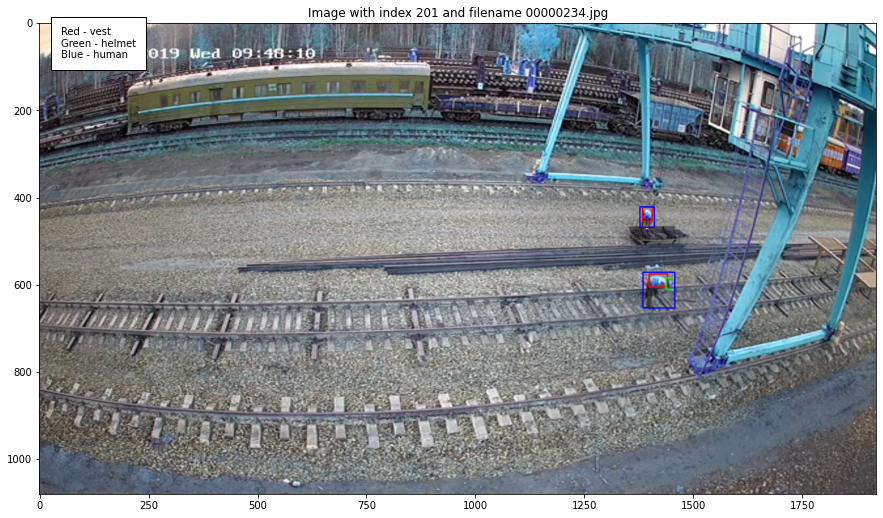

In [182]:
idx = np.random.randint(0, len(files))

image, _ = plot_image(idx)


plt.figure(figsize=(15, 15))
# this isn't the best way but ayyyyy it works(?)
plt.text(50, 80, 'Red - vest\nGreen - helmet\nBlue - human', bbox={'facecolor': 'white', 'pad': 10})
plt.imshow(image)
plt.title(f'Image with index {idx} and filename {files[idx]}.jpg')
plt.show()

## Result interpretation

On closer inspection of a few random images it's quite easy to understand theese classes, since now they're color coded in RGB sequence: 
-  0 - Vest
-  1 - Helmet
-  2 - Human
  
How I interpret theese results:  

- classes are *balanced*
- objects are all over the place and somewhat *equally distributed*, which is great
- objects are roughly *the same size* on the image, on plotted examples above we can see that the camera is 'far away' and boxes depict people and their parts, so yeah, I believe this one

Random
